## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset = dataset.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})
print(dataset.head())

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print("Attributes:")
print(dataset.columns)

print("Dataset dimension:")
print(dataset.shape)

print("Basic statistical information on numerical variables:")
print(dataset.describe())

print("Presence of `NaN`")
print(dataset.isna().sum())


Attributes:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
Dataset dimension:
(200, 5)
Basic statistical information on numerical variables:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
Presence of `NaN`
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
dataset = dataset.drop('CustomerID',axis=1)
print(dataset.head())

   Gender  Age  Income  SpendingScore
0    Male   19      15             39
1    Male   21      15             81
2  Female   20      16              6
3  Female   23      16             77
4  Female   31      17             40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

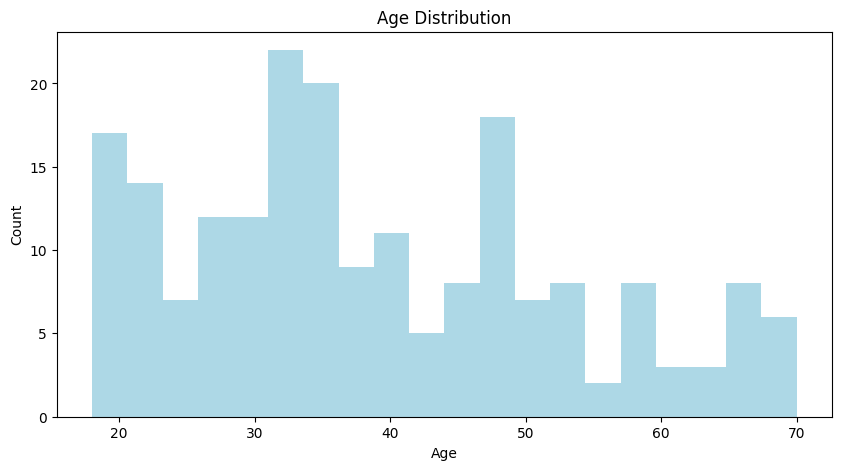

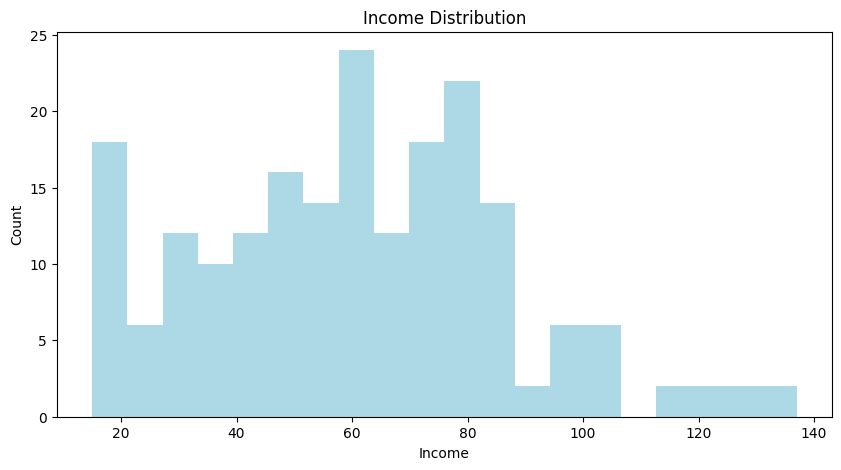

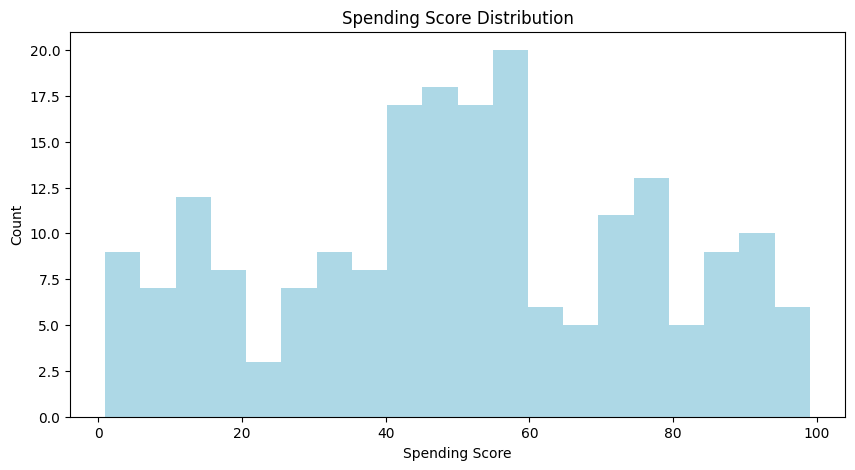

In [5]:
def plot_histogram(data, column_name, title, xlabel, ylabel, bins=20, color='lightblue'):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.hist(data[column_name], bins=bins, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_histogram(dataset, 'Age', 'Age Distribution', 'Age', 'Count')
plot_histogram(dataset, 'Income', 'Income Distribution', 'Income', 'Count')
plot_histogram(dataset, 'SpendingScore', 'Spending Score Distribution', 'Spending Score', 'Count')


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

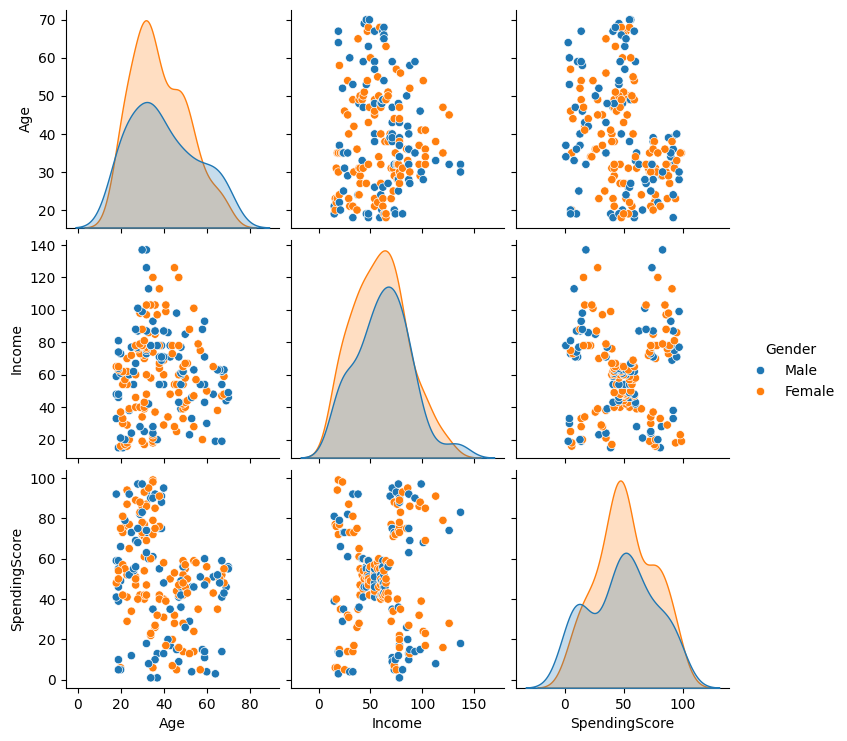

In [6]:
sns.pairplot(dataset,hue='Gender')
plt.show()

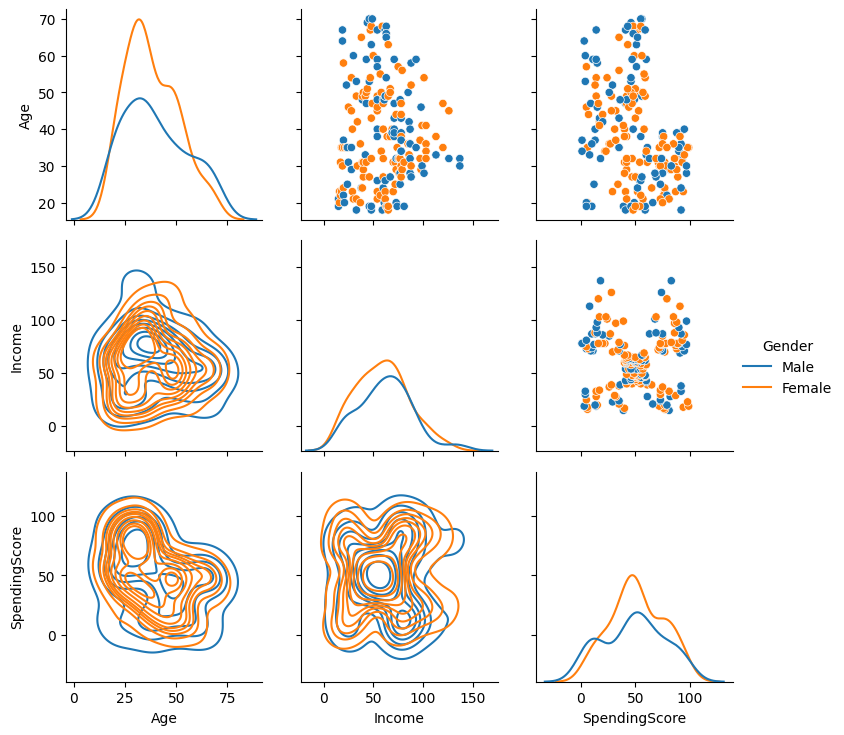

In [7]:
gender = sns.PairGrid(dataset, hue='Gender')
gender.map_upper(sns.scatterplot)
gender.map_diag(sns.kdeplot)
gender.map_lower(sns.kdeplot, lw=1)
gender.add_legend()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Проаналізувано вибірку з 200 записів та 5 атрибутів (CustomerID, Gender, Age, Income, SpendingScore). Виявлено, що даний датасет не містить пропущених значень (NaN).
2. CustomerID було виключено з аналізу, оскільки вона не має впливу на результати дослідження.
3. Діаграми розподілу показали, що більшість осіб у вибірці мають вік 30-35 років, дохід у діапазоні 60-80 тис. доларів і рівень витрат приблизно 50%.
4. При дослідженні змінних Age, Income та SpendingScore у відношенні до змінної Gender за допомогою графіків pairplot було виявлено п'ять кластерів. Однак, використовуючи sns.PairGrid, було визначено наявність можливих трьох кластерів.


**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Correlation by Gender:
 Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


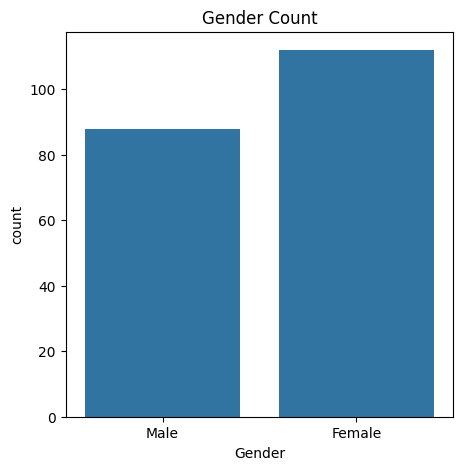

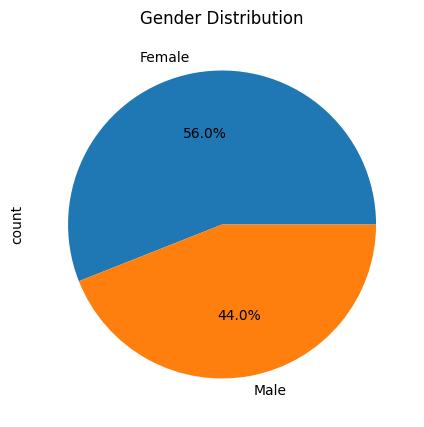

In [8]:
gender_cor = dataset['Gender'].value_counts(normalize=True)
print("Correlation by Gender:\n", gender_cor)

plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=dataset)
plt.title('Gender Count')
plt.show()

plt.figure(figsize=(10, 5))
dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

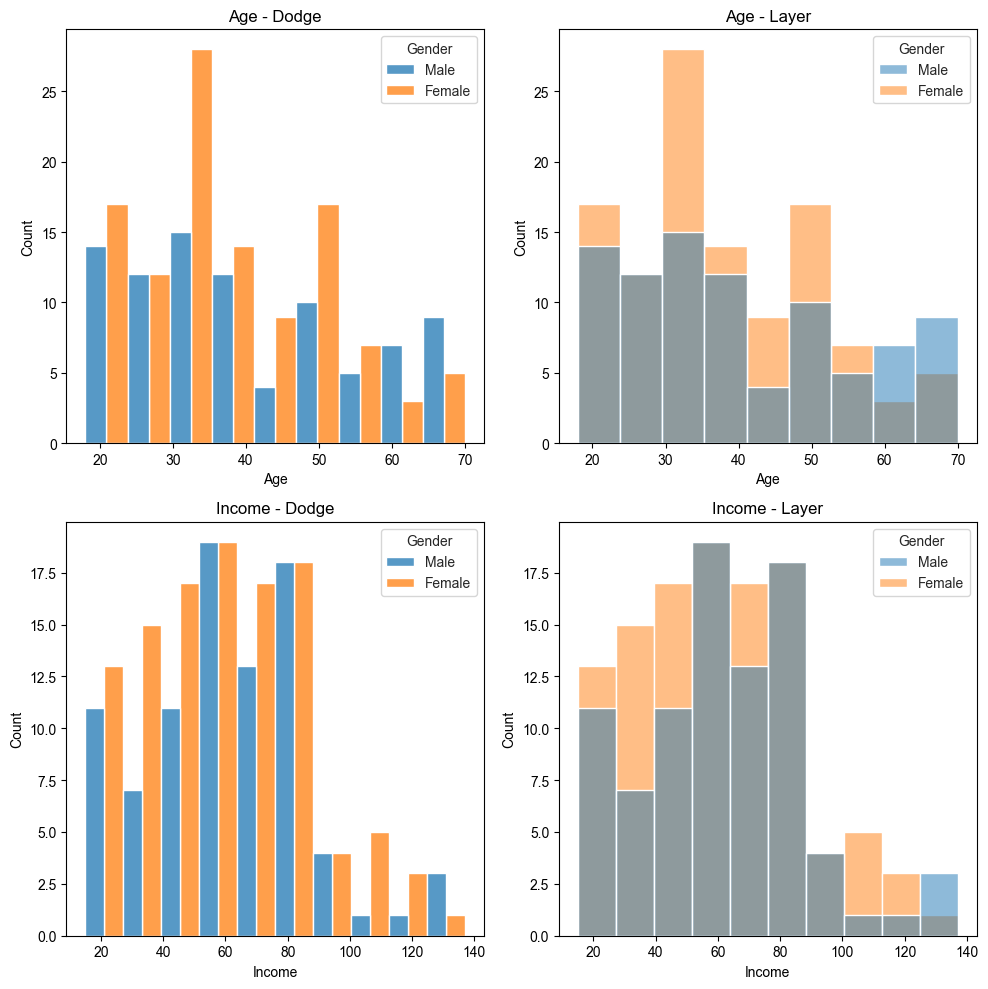

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
sns.set_style('whitegrid')

sns.histplot(data=dataset, x='Age', hue='Gender', multiple='dodge', ax=ax1)
ax1.set_title('Age - Dodge')

sns.histplot(data=dataset, x='Age', hue='Gender', multiple='layer', ax=ax2)
ax2.set_title('Age - Layer')

sns.histplot(data=dataset, x='Income', hue='Gender', multiple='dodge', ax=ax3)
ax3.set_title('Income - Dodge')

sns.histplot(data=dataset, x='Income', hue='Gender', multiple='layer', ax=ax4)
ax4.set_title('Income - Layer')

plt.tight_layout()
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



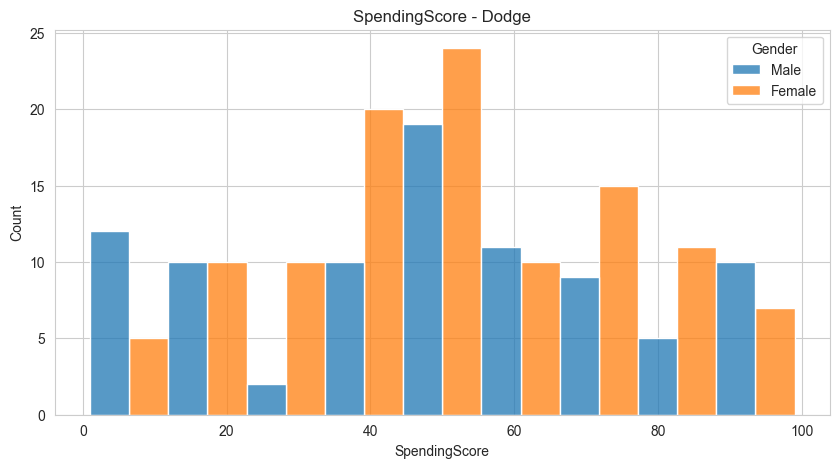

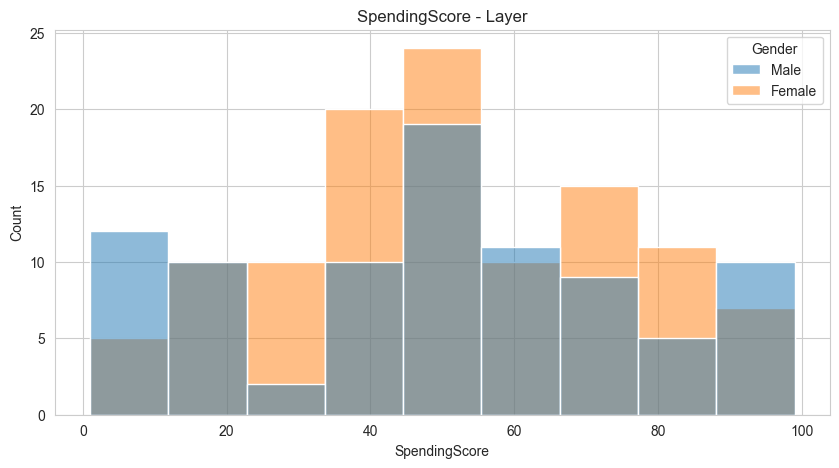

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='SpendingScore', hue='Gender', multiple='dodge')
plt.title('SpendingScore - Dodge')

plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='SpendingScore', hue='Gender', multiple='layer')
plt.title('SpendingScore - Layer')
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

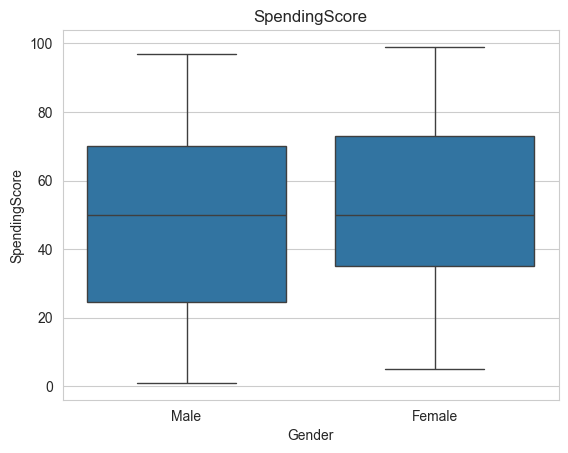

In [11]:
sns.boxplot(x='Gender', y='SpendingScore', data=dataset)
plt.title('SpendingScore')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
Після аналізу було встановлено, що жінок у вибірці більше ніж чоловіків (56% жінок та 44% чоловіків).

2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
За аналізом графіків можна виділити три групи: люди з низьким, середнім і високим рівнями доходу. З урахуванням статі, більшість жінок входять в категорії з низьким і високим рівнями доходу, тоді як серед чоловіків переважають ті, що мають середній рівень доходу.

3. Чи є різниця між витратами у чоловіків та жінок?
Витрати жінок незначно перевищують витрати чоловіків. Витрати у чоловіків коливаються від 25% до 70%, тоді як у жінок вони становлять від 35% до 75%.








## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**- оскільки ця змінна більше не потрібна для подального аналізу;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

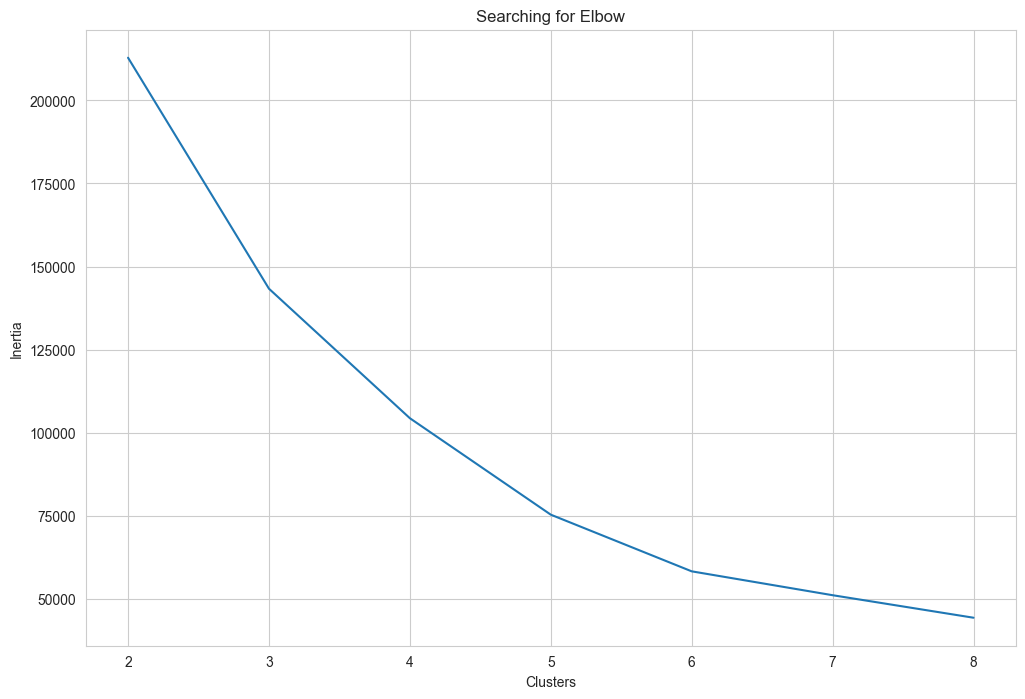

In [12]:
X = dataset.drop(['Gender'], axis=1)
clusters = []
min_clusters = 2
max_clusters = 8

for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    km.fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters + 1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.xticks(range(min_clusters, max_clusters + 1))

plt.show()


**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
 
Я вважаю, що оптимальним варіантом буде використання 5 кластерів

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

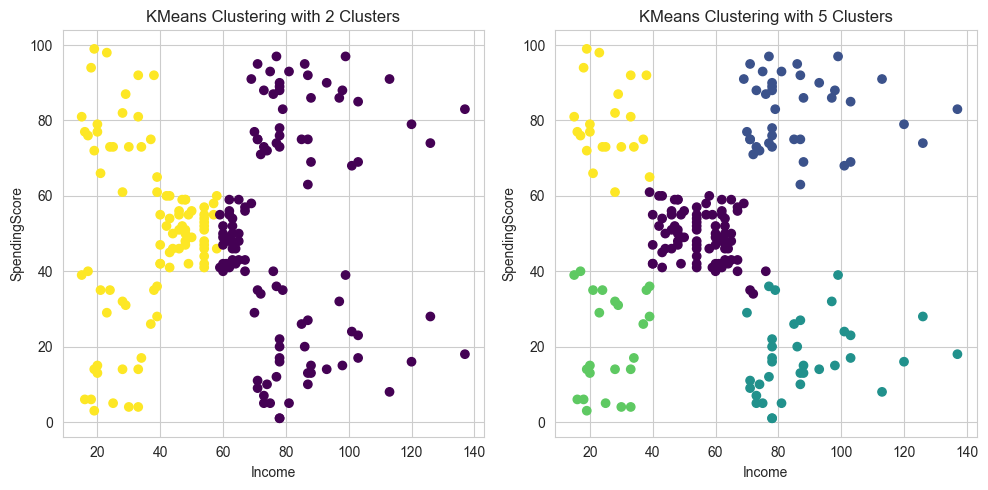

In [13]:
def plot_kmeans_clusters(X, n_clusters, ax):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_y = kmeans.fit_predict(X[['Income', 'SpendingScore']])
    
    ax.scatter(X['Income'], X['SpendingScore'], c=kmeans_y,  cmap='viridis')
    ax.scatter(X['Income'], X['SpendingScore'],  alpha=0)
    ax.set_title(f'KMeans Clustering with {n_clusters} Clusters')
    ax.set_xlabel('Income')
    ax.set_ylabel('SpendingScore')

n_clusters = [2, 5]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axs):
    plot_kmeans_clusters(X, n_clusters[i], ax)

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [23]:
n_clusters = [2, 5]

for i in range(2):
    kmeans = KMeans(n_clusters=n_clusters[i], init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_y = kmeans.fit_predict(X[['Income', 'SpendingScore']])
    
    X['Cluster'] = kmeans_y
    
    fig = px.scatter_3d(X, x='Income', y='SpendingScore', z='Cluster', color='Cluster')
    fig.update_layout(title=f' {n_clusters[i]} Clusters')
    fig.show()


**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.

Мінімальна кількість кластерів, яку можна використати для візуалізації - 2, щоб виділити основні частини розбиття даних. Максимальна кількість кластерів, яку доцільно використовувати - 5, щоб показати деталізацію розподілу і не враховувати викиди.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


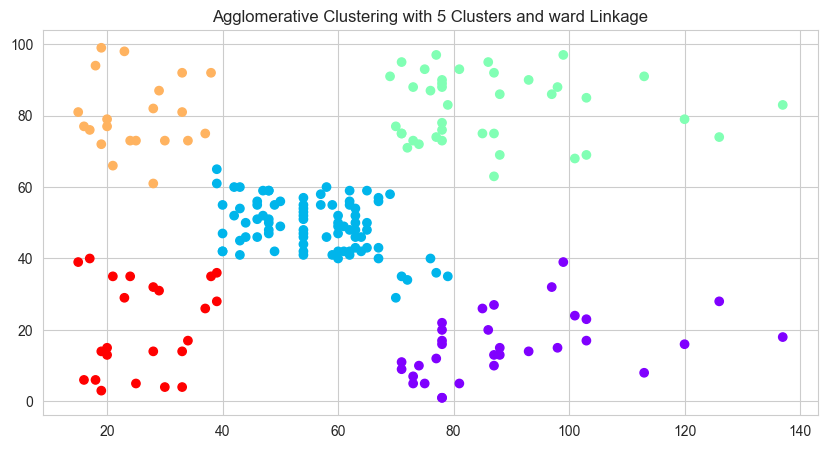

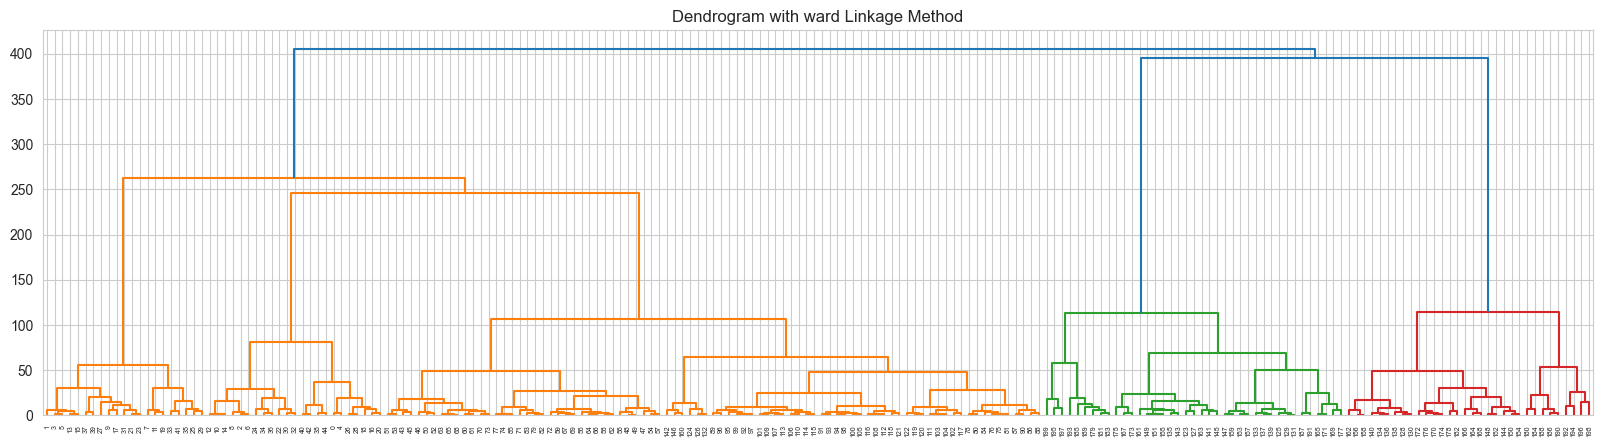

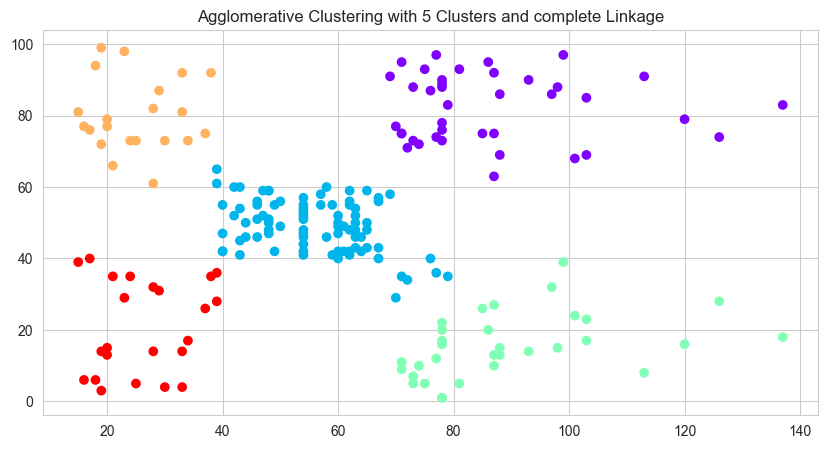

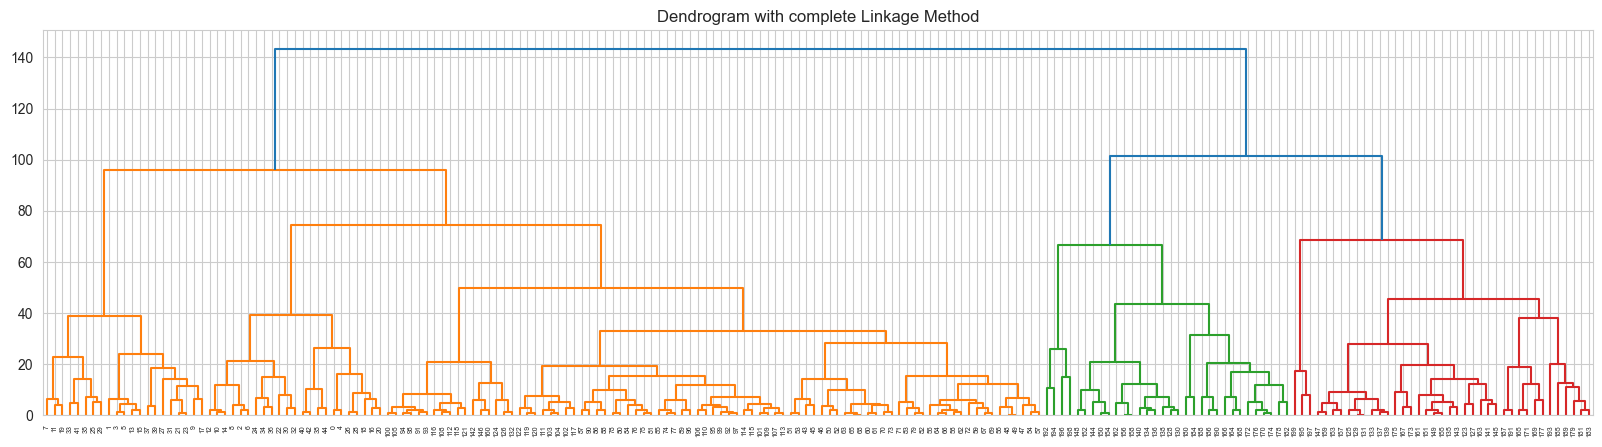

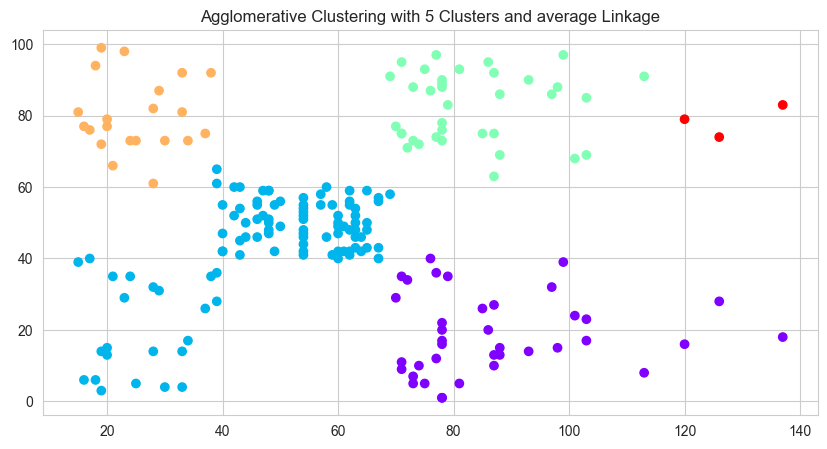

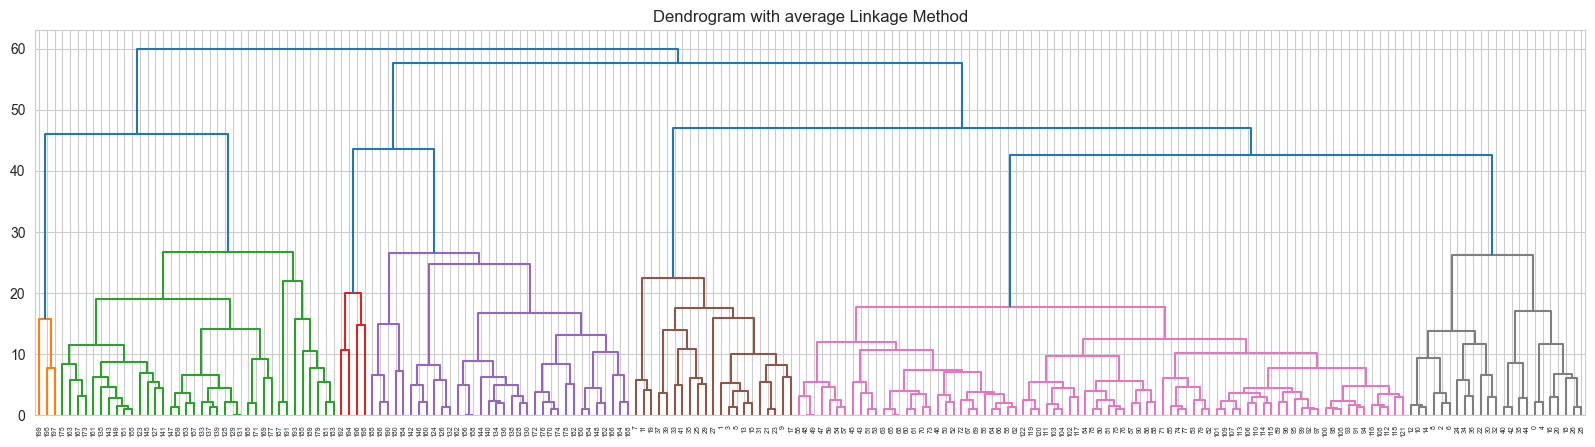

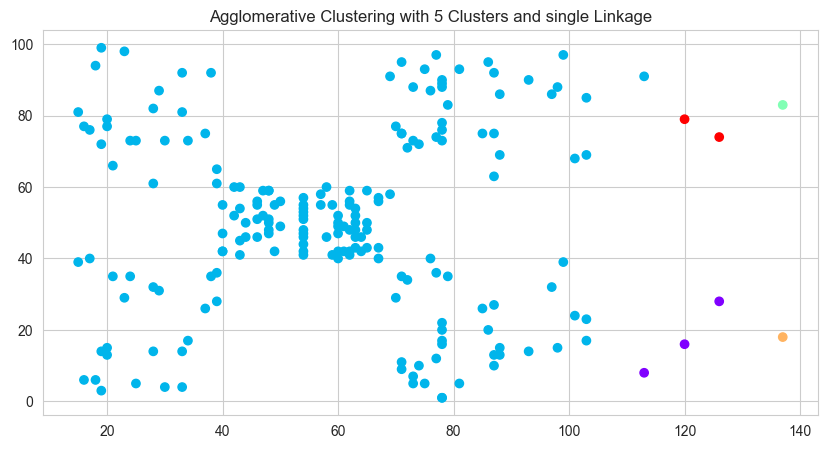

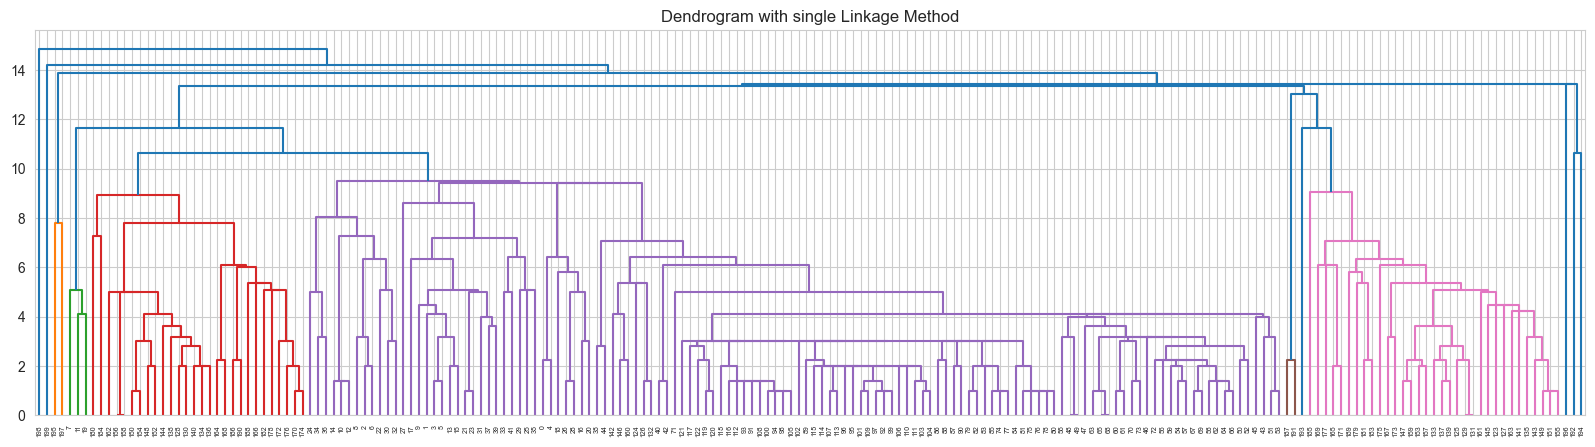

In [24]:
n_clusters = 5
linkage_params = ['ward', 'complete', 'average', 'single']

X_data = X[['Income', 'SpendingScore']]

for link in linkage_params:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    cluster_labels = cluster.fit_predict(X_data)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X['Income'], X['SpendingScore'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters and {link} Linkage')
    plt.show()

    Z = hierarchy.linkage(X_data, method=link)
    
    plt.figure(figsize=(20, 5))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram with {link} Linkage Method')
    plt.show()


**Висновки з завдання 12 (детальні)**

Датасет було поділено на п'ять кластерів за допомогою ієрархічної кластеризації. На дендрограмі видно п'ять груп. Одна з них є досить великою, отже це може вказувати на можливість поділу її навпіл (ще на два кластери)

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

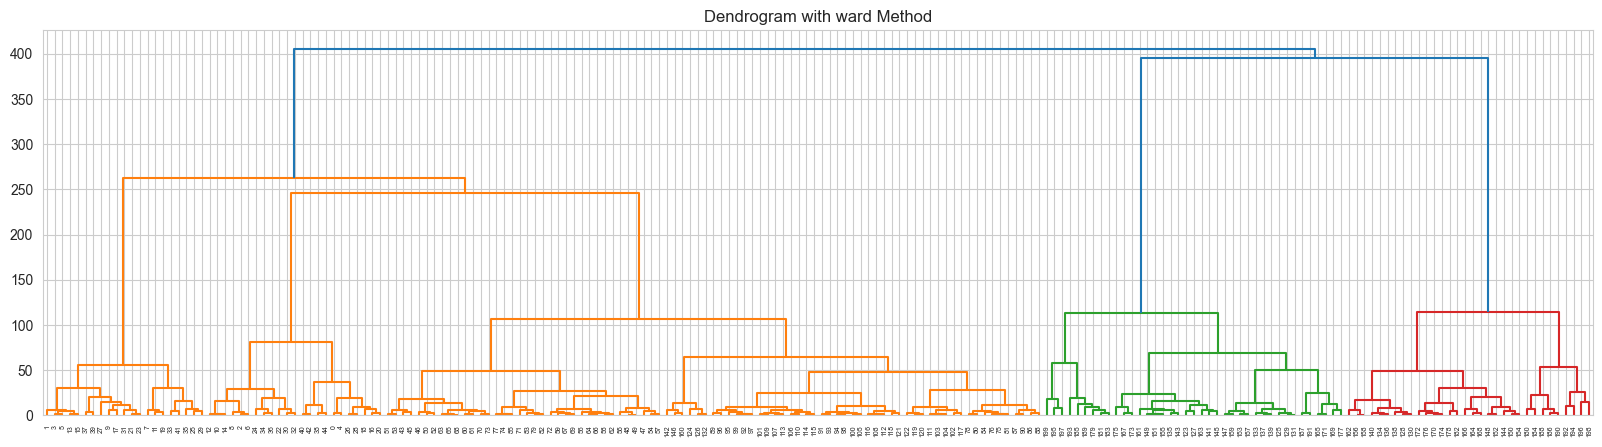

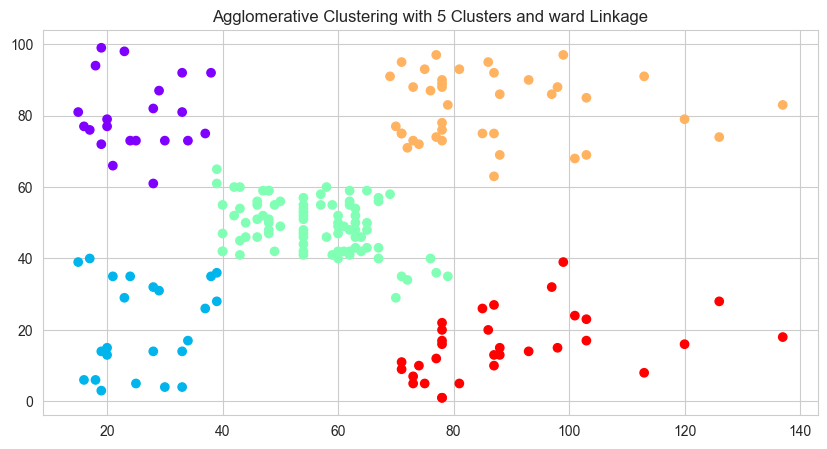

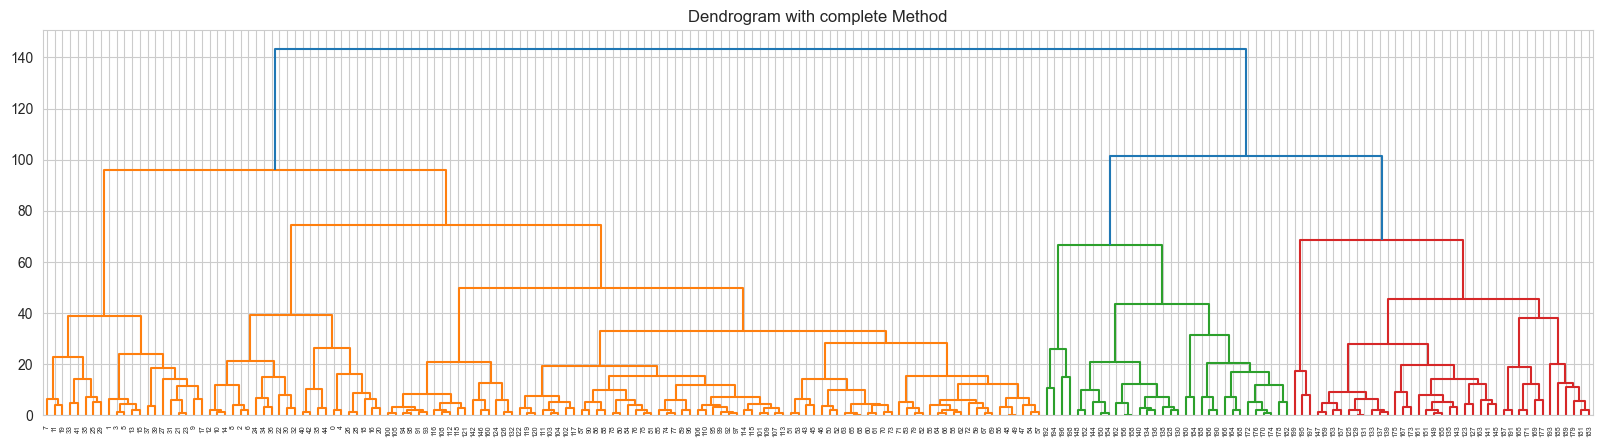

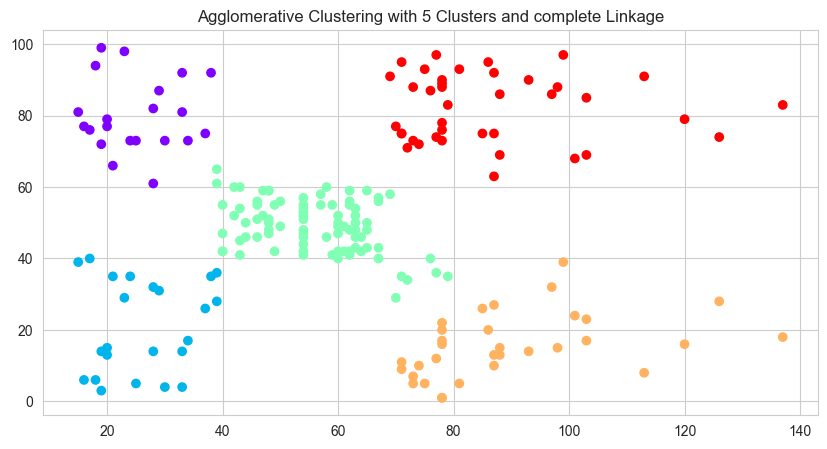

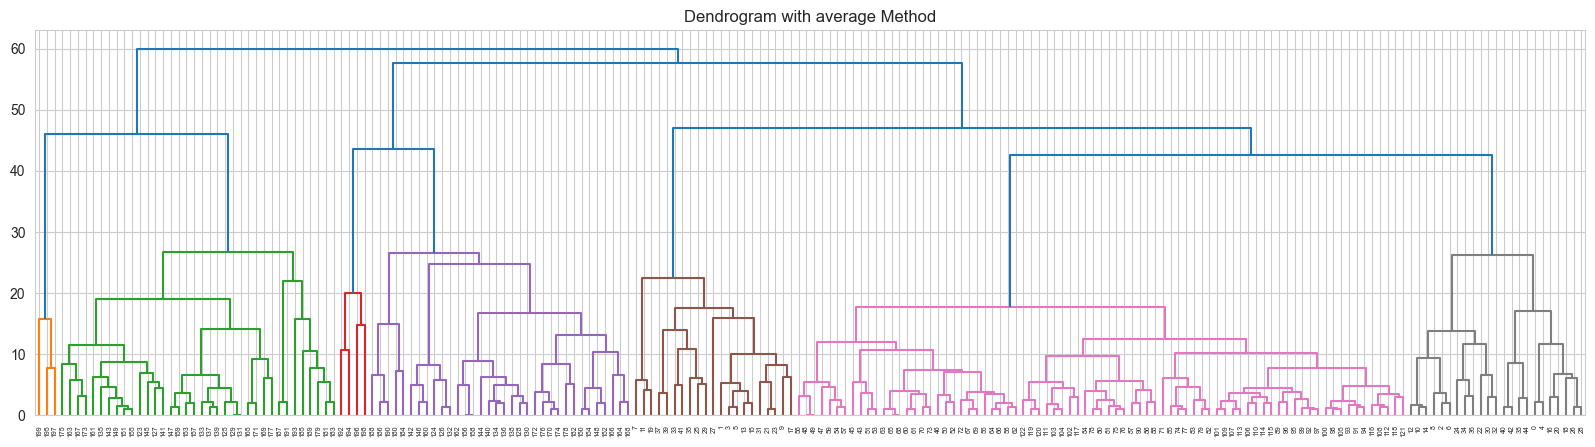

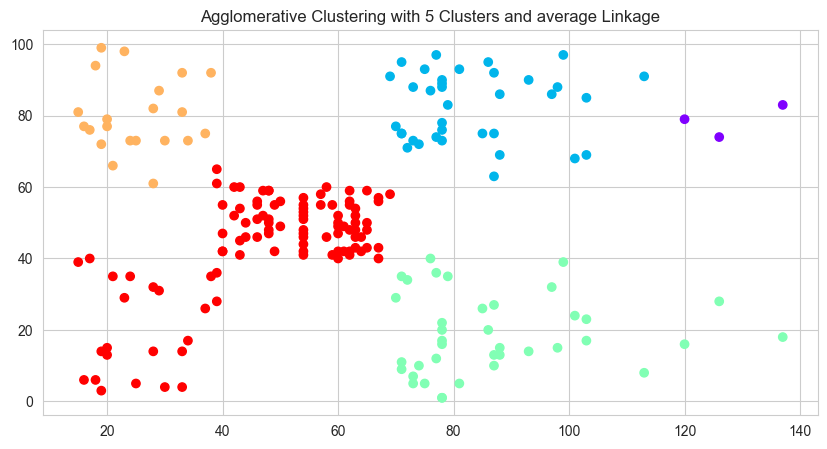

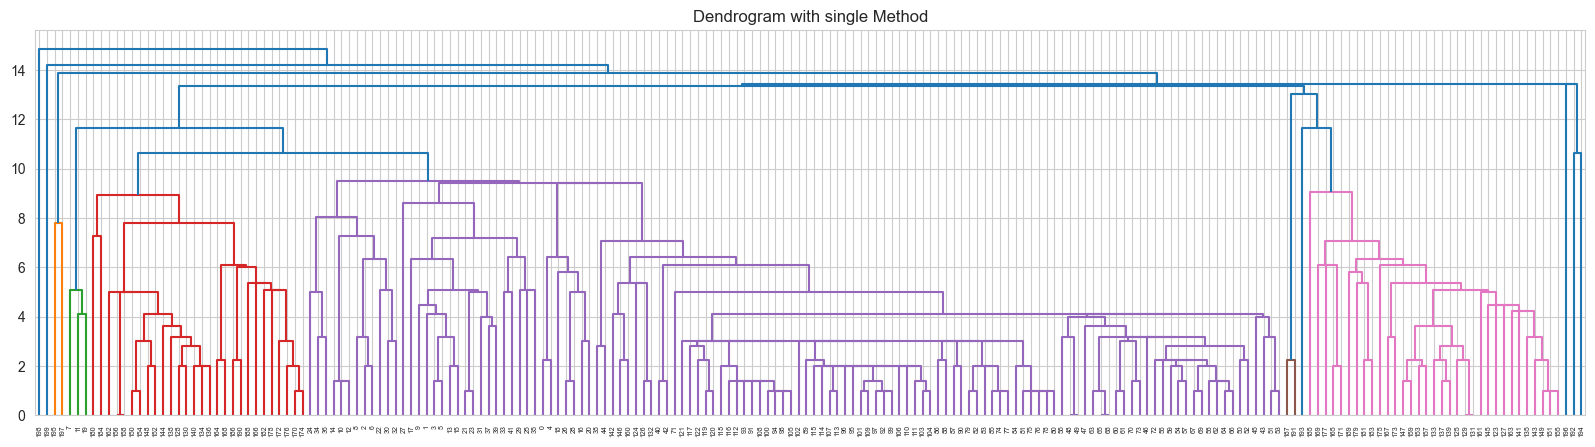

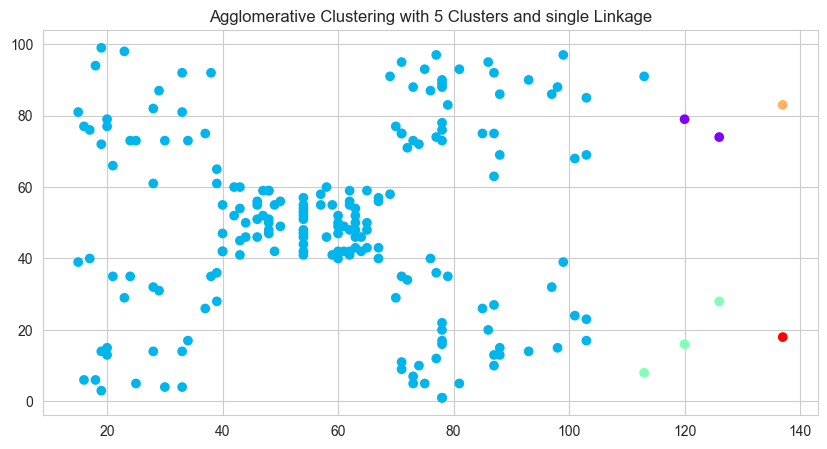

In [30]:
def plot_dendrogram_and_clusters(X, n_clusters, method):
    Z = hierarchy.linkage(X, method=method)
    
    plt.figure(figsize=(20, 5))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram with {method} Method')
    plt.show()
    
    labels = hierarchy.fcluster(Z, n_clusters, criterion='maxclust')
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X['Income'], X['SpendingScore'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters and {method} Linkage')
    plt.show()

n_clusters = 5
linkage_params = ['ward', 'complete', 'average', 'single']

for method in linkage_params:
    plot_dendrogram_and_clusters(X[['Income', 'SpendingScore']], n_clusters, method)



**Висновки з завдання 13 (детальні)**

На мою думку, агломеративне кластерування має кращий розподіл точок.